<a href="https://colab.research.google.com/github/techi-me/Face-Classification-using-SVM-and-Random-Forest/blob/main/ImageClassification_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd
import os
print(os.listdir("/content/drive/My Drive/INT 508 518 mini project/input"))

['image', 'image1', 'list_attr_celeba.csv', 'attr_list.csv', 'Basic', 'Project']


In [ ]:
main_folder = "/content/drive/My Drive/INT 508 518 mini project/input/"

In [ ]:
df_attr = pd.read_csv(main_folder + 'attr_list.csv')
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True)

In [ ]:
df = pd.DataFrame(df_attr)
X = df.iloc[:,0:39].values
Y = df.iloc[:,-1].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

**######## Random Forest#########**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
print(classifier.fit(X_train, Y_train))
Y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result2 = accuracy_score(Y_test, Y_pred)*100
print("Accuracy:",result2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy: 91.55555555555556


In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result2 = accuracy_score(Y_test, Y_pred)*100
print("Accuracy:",result2)

Accuracy: 91.55555555555556


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[480  43]
 [ 33 344]]


In [ ]:
result1 = classification_report(Y_test, Y_pred)
print("Classification Report:",result1)

Classification Report:               precision    recall  f1-score   support

           0       0.94      0.92      0.93       523
           1       0.89      0.91      0.90       377

    accuracy                           0.92       900
   macro avg       0.91      0.92      0.91       900
weighted avg       0.92      0.92      0.92       900



In [ ]:
result2 = accuracy_score(Y_test, Y_pred)*100
print("Accuracy:",result2)

Accuracy: 93.33333333333333


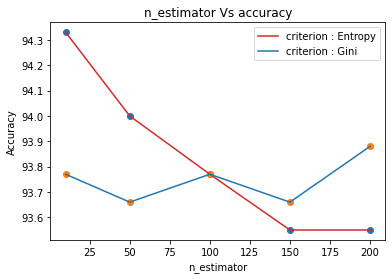

In [ ]:
import matplotlib.pyplot as plt
#n_estimator
a = [10,50,100,150,200]

#entropy
b = [94.33,94.0,93.77,93.55,93.55]

#gini
b1 = [93.77,93.66,93.77,93.66,93.88]

fig, ax = plt.subplots()
ax.plot(a, b,'tab:red')
ax.scatter(a,b)
ax.plot(a,b1,'tab:blue')
ax.scatter(a,b1)

ax.set_title('n_estimator Vs accuracy')
ax.legend(['criterion : Entropy','criterion : Gini'])
ax.xaxis.set_label_text('n_estimator')
ax.yaxis.set_label_text('Accuracy')


plt.show()

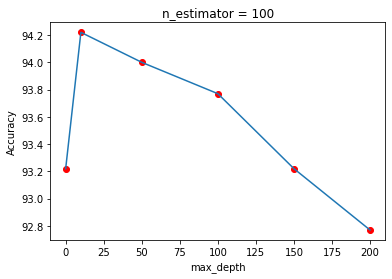

In [ ]:
p = [0,10,50,100,150,200]
q = [93.22,94.22,94.0,93.77,93.22,92.77]
plt.plot(p,q)
plt.scatter(p,q,color='red')
plt.title('n_estimator = 100')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

**######### Support Vector Machine ###########**

In [ ]:
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
sm1 = SVC(kernel='linear')
print("kernel-Linear")
print(sm1.fit(X_train, Y_train))
Y_pred1 = sm1.predict(X_test)
result_SVC1 = accuracy_score(Y_test, Y_pred1)*100
print("Accuracy:",result_SVC1)

kernel-Linear
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy: 92.88888888888889


In [ ]:
sm2 = SVC(kernel='rbf')
print("kernel-rbf")
print(sm2.fit(X_train, Y_train))
Y_pred2 = sm1.predict(X_test)
result_SVC2 = accuracy_score(Y_test, Y_pred2)*100
print("Accuracy:",result_SVC2)

kernel-rbf
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy: 92.88888888888889


In [ ]:
sm3 = SVC(kernel='sigmoid')
print("kernel-sigmoid")
print(sm3.fit(X_train, Y_train))
Y_pred3 = sm3.predict(X_test)
result_SVC3 = accuracy_score(Y_test, Y_pred3)*100
print("Accuracy:",result_SVC3)

kernel-sigmoid
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy: 90.33333333333333


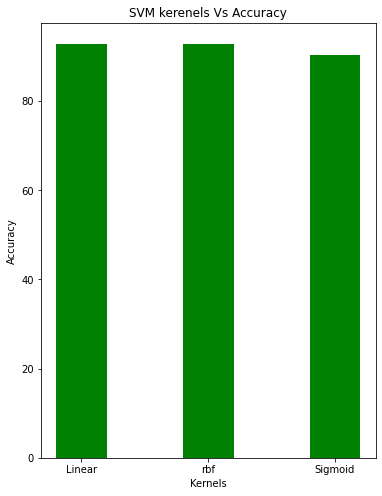

In [ ]:
fig = plt.figure(figsize = (6,8)) 
reults=[result_SVC1, result_SVC2, result_SVC3]
kernel=["Linear","rbf","sigmoid"]
# creating the dataset 
data = {"Linear":result_SVC1, 'rbf':result_SVC2, 'Sigmoid':result_SVC3} 
courses = list(data.keys()) 
values = list(data.values()) 
  
# creating the bar plot 
plt.bar(courses, values, color ='green',width = 0.4) 
  
plt.xlabel("Kernels") 
plt.ylabel("Accuracy") 
plt.title("SVM kerenels Vs Accuracy") 
plt.show() 

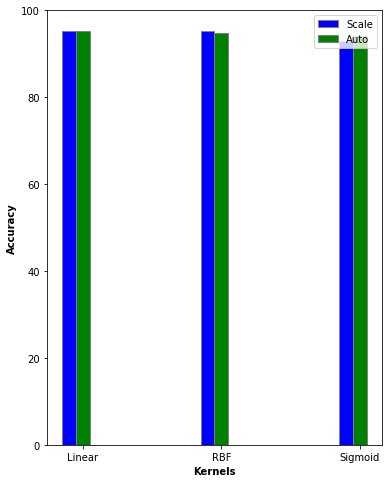

In [ ]:
# set width of bar 
barWidth = 0.10
fig = plt.subplots(figsize =(6,8)) 
   
# set height of bar 
scale = [95.22,95.33,92.88] 
auto = [95.22,94.88,94.00] 
   
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
   
# Make the plot 
plt.bar(br1, scale, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Scale') 
plt.bar(br2, auto, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Auto') 
   
# Adding Xticks  
plt.xlabel('Kernels', fontweight ='bold') 
plt.ylabel('Accuracy', fontweight ='bold') 
plt.legend(['Scale','Auto'])
plt.xticks([r + barWidth for r in range(len(scale))], 
           ['Linear','RBF','Sigmoid']) 
   
plt.show() 

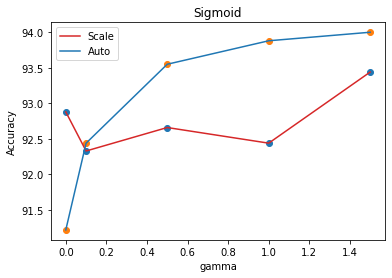

In [ ]:
import matplotlib.pyplot as plt
#coef
coef = [0.0,0.1,0.5,1.0,1.5]

#scale
scale = [92.88,92.33,92.66,92.44,93.44]

#auto
auto = [91.22,92.44,93.55,93.88,94.0]

fig, ax = plt.subplots()
ax.plot(coef, scale,'tab:red')
ax.scatter(coef,scale)
ax.plot(coef,auto,'tab:blue')
ax.scatter(coef,auto)

ax.set_title('Sigmoid')
ax.legend(['Scale','Auto'])
ax.xaxis.set_label_text('gamma')
ax.yaxis.set_label_text('Accuracy')


plt.show()